In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
import datetime as dt
%matplotlib inline

In [152]:
df = pd.read_csv('../pre_processed_data.csv')

## Data adaptation: genre data stacking¶

In [5]:
# Remove the "|" and split each cell content accordingly, in colums
df_genre = df.join(df.genres.str.strip('|').str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre'))

# Check visually the content of the new "genre" column
df_genre.genre.tail(4)

10863    Comedy
10864    Action
10864    Comedy
10865    Horror
Name: genre, dtype: object

# Viz 1: Genre breakdown of movie counts

In [8]:
genre_count = df_genre.groupby('genre').count()

genre_count = genre_count.reset_index()
genre_count.head()

,genre,Unnamed: 0,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,...,overview_adjectives,overview_verbs,overview_nav,no_tokens,overview_person,overview_org,overview_date,overview_time,overview_money,overview_gpe
0,Action,2385,2385,2380,2385,2385,2385,2385,2382,639,...,2261,2371,2385,2385,1584,1074,480,70,13,919
1,Adventure,1471,1471,1469,1471,1471,1471,1471,1469,443,...,1395,1456,1471,1471,1038,684,323,32,9,545
2,Animation,699,699,697,699,699,699,699,669,259,...,667,690,699,699,512,349,133,18,1,211
3,Comedy,3793,3793,3792,3793,3793,3793,3793,3785,933,...,3573,3746,3792,3793,2501,1383,895,146,17,1255
4,Crime,1355,1355,1355,1355,1355,1355,1355,1355,324,...,1265,1344,1355,1355,833,464,264,33,10,498


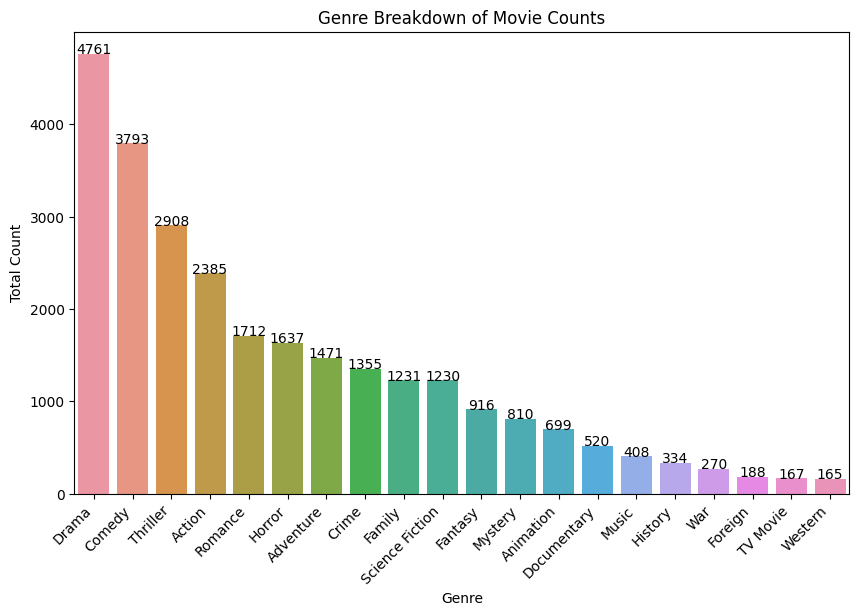

In [9]:
fig = plt.figure(figsize=(10,6))
sns.set_palette("muted")

ax = sns.barplot(data=genre_count, x='genre', y='id', 
                 order=genre_count.sort_values('id', ascending=False)['genre'])

# Add numerical values to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height()+0.5, int(p.get_height()), 
            ha='center', fontsize=10)

ax.set(title='Genre Breakdown of Movie Counts', xlabel='Genre', ylabel='Total Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
plt.show()

# Viz 2: word frequency by genre

In [67]:
top_10_genre = genre_count.nlargest(10, 'id')['genre']

In [49]:
# get top_10_lemma

def my_tokenizer(text):
    return text.split() if(text != None and isinstance(text, str)) else []

# transform list of documents into a single list of tokens
tokens = df_genre.overview_lemma.map(my_tokenizer).sum()

In [53]:
counter = Counter(tokens)
top_20_word = counter.most_common(20)

print([t[0] for t in top_20_word])  

['find', 'life', 'young', 'man', 'friend', 'world', 'love', 'family', 'new', 'year', 'story', 'take', 'film', 'woman', 'time', 'help', 'discover', 'try', 'come', 'way']


In [54]:
def get_counter_by_genre(genre):
    print(genre)
    df_filtered = df_genre[df_genre['genre'] == genre]
    tokens = df_filtered.overview_lemma.map(my_tokenizer).sum()
    return Counter(tokens)

In [55]:
counter_list = {}
for i in top_10_genre:
    counter_list[i] = get_counter_by_genre(i)

Drama
Comedy
Thriller
Action
Romance
Horror
Adventure
Crime
Family
Science Fiction


In [56]:
counter_list['Drama']['1820']

2

In [57]:
data = {'Genre': [genre for genre in top_10_genre]}

for word_info in top_20_word:
    word = word_info[0]
    word_count = []
    for genre in top_10_genre:
        word_count.append(counter_list[genre][word])
    data[word] = word_count

In [63]:
df = pd.DataFrame(data)
# Define custom order for the x-axis labels
df

,Genre,find,life,young,man,friend,world,love,family,new,...,story,take,film,woman,time,help,discover,try,come,way
0,Drama,817,1198,789,739,531,419,629,598,362,...,651,407,392,493,323,277,274,344,311,299
1,Comedy,738,673,411,497,555,308,484,381,384,...,240,285,292,332,320,321,243,305,272,281
2,Thriller,564,476,402,410,263,242,122,277,209,...,189,271,149,244,187,193,262,210,201,184
3,Action,445,332,245,316,188,274,129,155,235,...,142,209,142,122,200,198,157,159,159,171
4,Romance,367,457,321,297,240,125,566,159,146,...,194,138,106,302,148,128,107,135,123,112
5,Horror,294,201,252,175,199,117,50,202,157,...,116,139,123,136,101,75,171,118,132,115
6,Adventure,333,185,172,168,169,229,99,118,170,...,112,144,87,62,130,155,115,106,107,110
7,Crime,233,196,154,212,124,84,62,109,96,...,118,112,96,108,79,93,73,103,82,80
8,Family,291,172,175,76,215,196,108,188,195,...,101,94,93,27,114,148,111,109,113,100
9,Science Fiction,267,174,111,133,78,218,71,66,145,...,69,95,91,79,152,93,124,85,98,90


/var/folders/y1/lcpdlr2n1d18r19vy7q62kyw0000gn/T/ipykernel_36171/428668379.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_long.pivot('Keyword', 'Genre', 'Frequency'), cmap='Blues', annot=True, fmt='g')


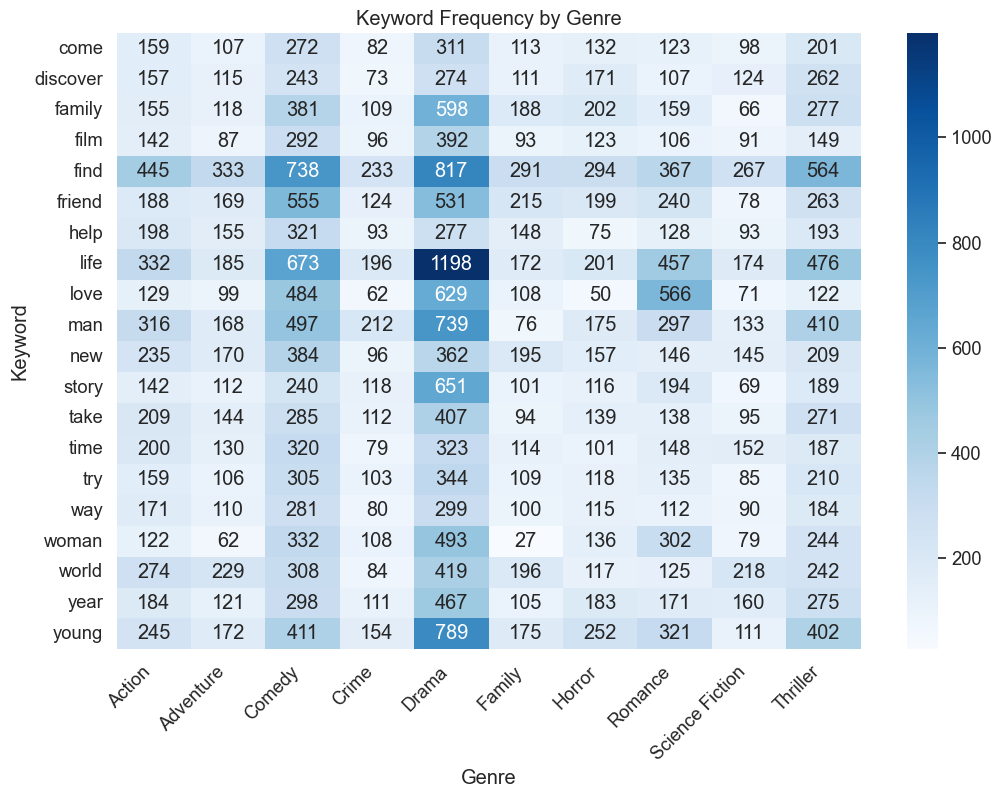

In [71]:
# Create a sample dataframe
df = pd.DataFrame(data)

# Convert dataframe to long format
df_long = pd.melt(df, id_vars=['Genre'], var_name='Keyword', value_name='Frequency')


# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap
ax = sns.heatmap(df_long.pivot('Keyword', 'Genre', 'Frequency'), cmap='Blues', annot=True, fmt='g')

# Set plot title and axis labels
plt.title('Keyword Frequency by Genre')
plt.xlabel('Genre')
plt.ylabel('Keyword')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.show()


## Viz 3: Genre and ROI

In [155]:
df_genre.columns

Index(['Unnamed: 0', 'id', 'imdb_id', 'popularity', 'budget', 'revenue',
       'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'genres_1', 'genres_2', 'genres_3', 'genres_4',
       'genres_5', 'overview_lemma', 'overview_nouns', 'overview_adjectives',
       'overview_verbs', 'overview_nav', 'no_tokens', 'overview_person',
       'overview_org', 'overview_date', 'overview_time', 'overview_money',
       'overview_gpe', 'genre', 'ROI', 'roi', 'person', 'org', 'date', 'time',
       'money', 'gpe'],
      dtype='object')

/var/folders/y1/lcpdlr2n1d18r19vy7q62kyw0000gn/T/ipykernel_36171/1769352936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['roi'] = df_genre['revenue_adj'] - df_genre['budget_adj']


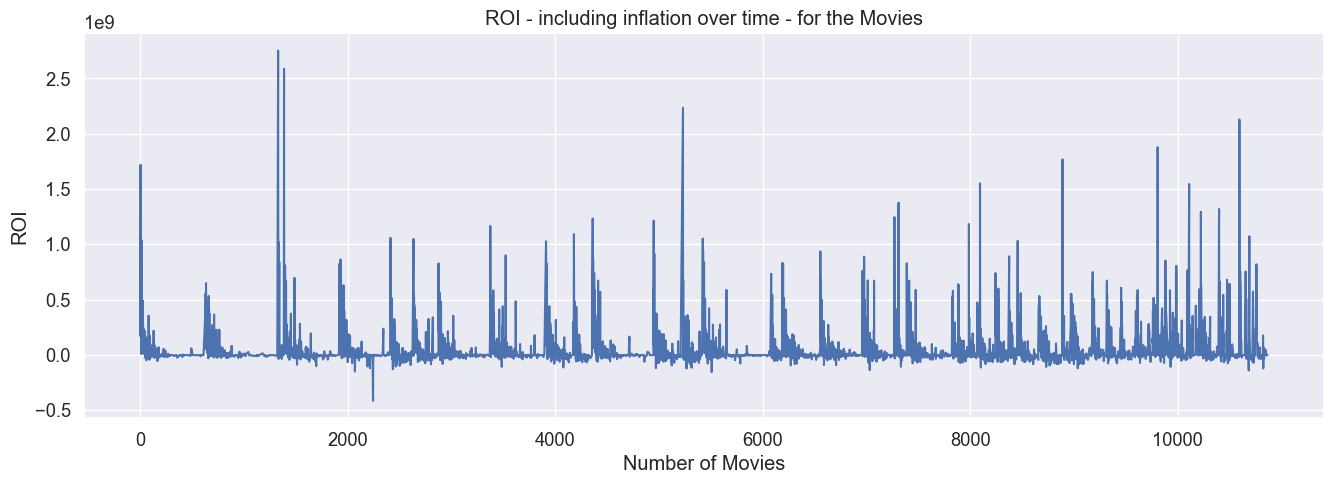

In [97]:
df_genre = df_genre[df_genre['budget_adj']!=0]
df_genre['roi'] = df_genre['revenue_adj'] - df_genre['budget_adj']

# plot the revenues for all movies in the dataset
plt.subplots(figsize=(16, 5))
plt.plot(df_genre['roi'])
plt.title('ROI - including inflation over time - for the Movies')
plt.xlabel('Number of Movies')
plt.ylabel('ROI');

In [116]:
# select high revenues
high_ROI = df_genre['roi'].nlargest(30)


In [117]:
# Get an entire dataframe for movies with high revenues
df_high_roi = df_genre.query('roi in @high_ROI')

In [118]:
# Add a new column "revenue_level" with "low" as default value
df_roi = df_genre.assign(roi_level='low')

In [119]:
# set "high" where for the movies with high revenues
for roi in high_ROI:
    df_roi.loc[df_roi['roi'] == roi, 'roi_level'] = 'high'

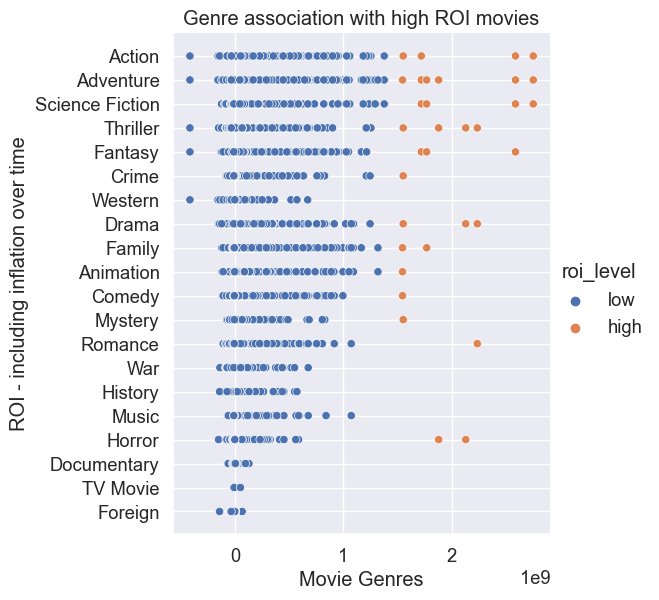

In [120]:
# plot of budget association with revenue
budgetplot = sns.relplot(x="roi", y="genre", hue="roi_level", data=df_roi, height=6)
budgetplot.set(title='Genre association with high ROI movies', 
               xlabel='Movie Genres', 
               ylabel='ROI - including inflation over time');

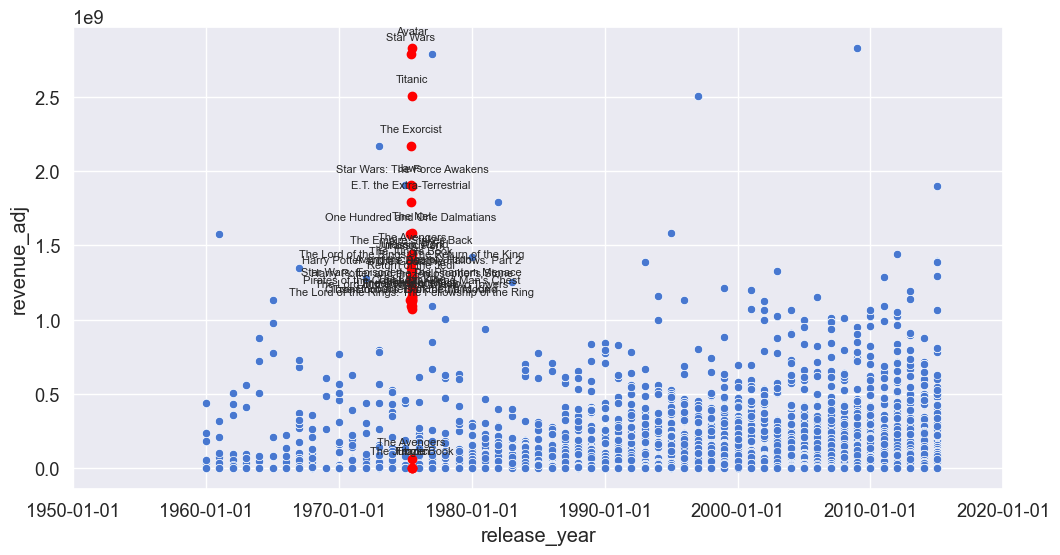

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))
# create scatter plot
ax = sns.scatterplot(data=df_genre, x='release_year', y='revenue_adj')

# set top 10 revenue movies to different color
top10_movies = df_genre.sort_values('revenue_adj', ascending=False).head(100)['original_title'].tolist()

for i, point in df.iterrows():
    if point['original_title'] in top10_movies:
        ax.scatter(point['release_year'], point['revenue_adj'], color='red')
        ax.annotate(point['original_title'], (point['release_year'], point['revenue_adj']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# show every 10 years on x-axis
xticks = ax.get_xticks()
ax.set_xticks(xticks[::1])

plt.show()

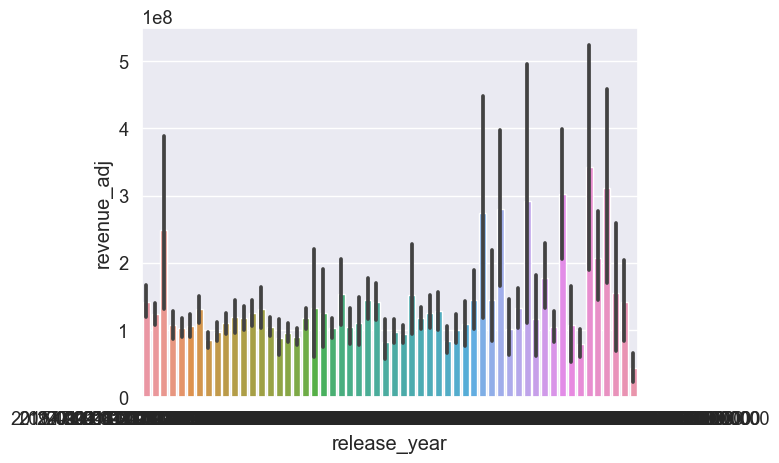

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# create barplot
ax = sns.barplot(data=df_genre, x='release_year', y='revenue_adj')

# set top 10 revenue movies to different color
top10_movies = df_genre.sort_values('revenue_adj', ascending=False).head(10)['original_title'].tolist()

for i, bar in enumerate(ax.containers[0].patches):
    if bar.get_height() != 0 and df.loc[i, 'original_title'] in top10_movies:
        bar.set_color('red')
        ax.text(i, bar.get_height() + 1e8, df.loc[i, 'original_title'], ha='center', fontsize=8)

plt.show()


AttributeError: 'BarContainer' object has no attribute 'bars'

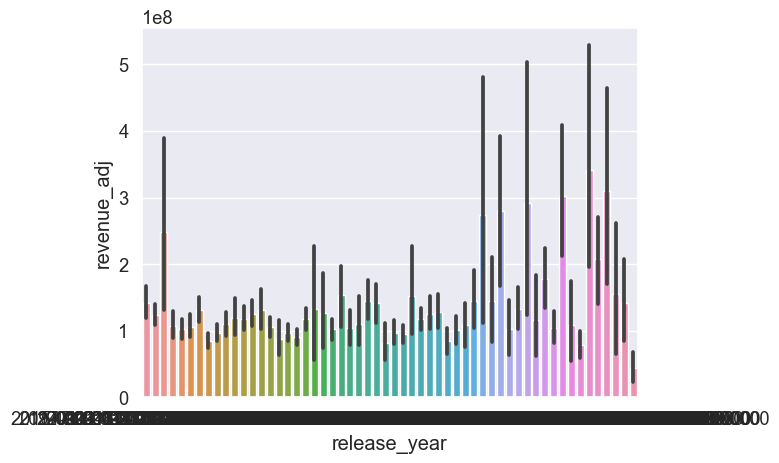

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# create barplot
ax = sns.barplot(data=df_genre, x='release_year', y='revenue_adj')

# set top 10 revenue movies to different color
top10_movies = df_genre.sort_values('revenue_adj', ascending=False).head(10)['original_title'].tolist()

for i, bar in enumerate(ax.containers[0].bars):
    if bar.get_height() != 0 and df.loc[i, 'original_title'] in top10_movies:
        bar.set_color('red')
        ax.text(i, bar.get_height() + 1e8, df.loc[i, 'original_title'], ha='center', fontsize=8)

plt.show()


## Viz 4: named entity by Genre

In [ ]:
import spacy
import re
import contractions
import unicodedata

nlp = spacy.load('en_core_web_sm')

df = df_genre
for i, row in df.iterrows():
    if i % 1000 == 0:
        print(i)
    if row["overview"]:
        
        # Remove special characters using regular expression
        clean_text = re.sub(r'[^\w\s]', '', str(row["overview"]))
        
        # Remove accent characters using the unicodedata module
        no_accent_text = ''.join(char for char in unicodedata.normalize('NFD', clean_text) if unicodedata.category(char) != 'Mn')
        
        # Expand contractions using contractions library
        expanded_text = contractions.fix(no_accent_text)
        
        doc = nlp(expanded_text)
        
        person = []
        org = []
        gpe = [] # geopolitical entity
        date = []
        time = []
        money = []

        # Named entity recognition
        for ent in doc.ents:
#             print(ent.text, ent.label_)
            if ent.label_ == "PERSON":
                person.append(ent.text)
            if ent.label_ == "ORG":
                org.append(ent.text)
            if ent.label_ == "DATE":
                date.append(ent.text)
            if ent.label_ == "TIME":
                time.append(ent.text)
            if ent.label_ == "MONEY":
                money.append(ent.text)
            if ent.label_ == "GPE":
                gpe.append(ent.text)
                
        df.at[i, "person"] = "|".join(person)                
        df.at[i, "org"] = "|".join(org)
        df.at[i, "date"] = "|".join(date)
        df.at[i, "time"] = "|".join(time)
        df.at[i, "money"] = "|".join(money)
        df.at[i, "gpe"] = "|".join(gpe)

In [131]:
# get top_entities

def my_tokenizer(text):
    return text.split('|') if(text != None and isinstance(text, str)) else []

# transform list of documents into a single list of tokens
names = df_genre.person.map(my_tokenizer).sum()
org = df_genre.org.map(my_tokenizer).sum()
date = df_genre.date.map(my_tokenizer).sum()
time = df_genre.time.map(my_tokenizer).sum()
money = df_genre.money.map(my_tokenizer).sum()
gpe = df_genre.gpe.map(my_tokenizer).sum()

In [ ]:

        
for i, row in df.iterrows():
    if i % 1000 == 0:
        print(i)
#     if(row["overview"] and len(str(row["overview"])) < 1000000):
    if row["overview"]:
        # Remove special characters using regular expression
        clean_text = re.sub(r'[^\w\s]', '', str(row["overview"]))
        # Remove accent characters using the unicodedata module
        no_accent_text = ''.join(char for char in unicodedata.normalize('NFD', clean_text) if unicodedata.category(char) != 'Mn')
        # Expand contractions using contractions library
        expanded_text = contractions.fix(no_accent_text)
        doc = nlp(expanded_text)
        # Tokenization
        tokens = [token.text for token in doc]
#         print('tokens', tokens)
        # Stopword removal
        filtered_tokens = [token for token in doc if not token.is_stop]
#         print('filtered_tokens', filtered_tokens)
        # Lemmatization
        lemmas = [token.lemma_ for token in doc if not token.is_stop]
#         print('lemmas', lemmas)
        adjectives = []
        nouns = []
        verbs = []
        # Add part-of-speech (POS) tagging
        for token in filtered_tokens:
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
        df.at[i, "overview_lemma"] = " ".join(lemmas)
        df.at[i, "overview_nouns"] = " ".join(nouns)
        df.at[i, "overview_adjectives"] = " ".join(adjectives)
        df.at[i, "overview_verbs"] = " ".join(verbs)
        df.at[i, "overview_nav"] = " ".join(nouns+adjectives+verbs)
        df.at[i, "no_tokens"] = len(lemmas)
        
        for ent in doc.ents:
#             print(ent.text, ent.label_)
            if ent.label_ == "PERSON":
                person.append(ent.text)
            if ent.label_ == "ORG":
                org.append(ent.text)
            if ent.label_ == "DATE":
                date.append(ent.text)
            if ent.label_ == "TIME":
                time.append(ent.text)
            if ent.label_ == "MONEY":
                money.append(ent.text)
            if ent.label_ == "GPE":
                gpe.append(ent.text)
        df.at[i, "overview_person"] = "|".join(person)
        df.at[i, "overview_org"] = "|".join(org)
        df.at[i, "overview_date"] = "|".join(date)
        df.at[i, "overview_time"] = "|".join(time)
        df.at[i, "overview_money"] = "|".join(money)
        df.at[i, "overview_gpe"] = "|".join(gpe)

In [140]:
named_entities = names + org + date + time + money + gpe
named_entities = [x for x in named_entities if x != '']

In [141]:
named_entitiy_counter = Counter(named_entities)
top_20_entities = named_entitiy_counter.most_common(20)

print([t[0] for t in top_20_entities])  

['New York', 'US', 'Los Angeles', 'FBI', 'New York City', 'London', 'CIA', 'Chicago', 'California', 'years', 'America', 'Jack', 'Hollywood', 'Paris', 'the United States', 'Texas', 'Christmas', 'Nick', 'Peter', 'the day']


In [142]:
top_20_entities

[('New York', 355),
 ('US', 270),
 ('Los Angeles', 263),
 ('FBI', 248),
 ('New York City', 181),
 ('London', 158),
 ('CIA', 157),
 ('Chicago', 108),
 ('California', 107),
 ('years', 105),
 ('America', 102),
 ('Jack', 101),
 ('Hollywood', 100),
 ('Paris', 94),
 ('the United States', 89),
 ('Texas', 89),
 ('Christmas', 82),
 ('Nick', 78),
 ('Peter', 76),
 ('the day', 76)]

In [143]:
names = [t[0] for t in top_20_entities]
count = [t[1] for t in top_20_entities]

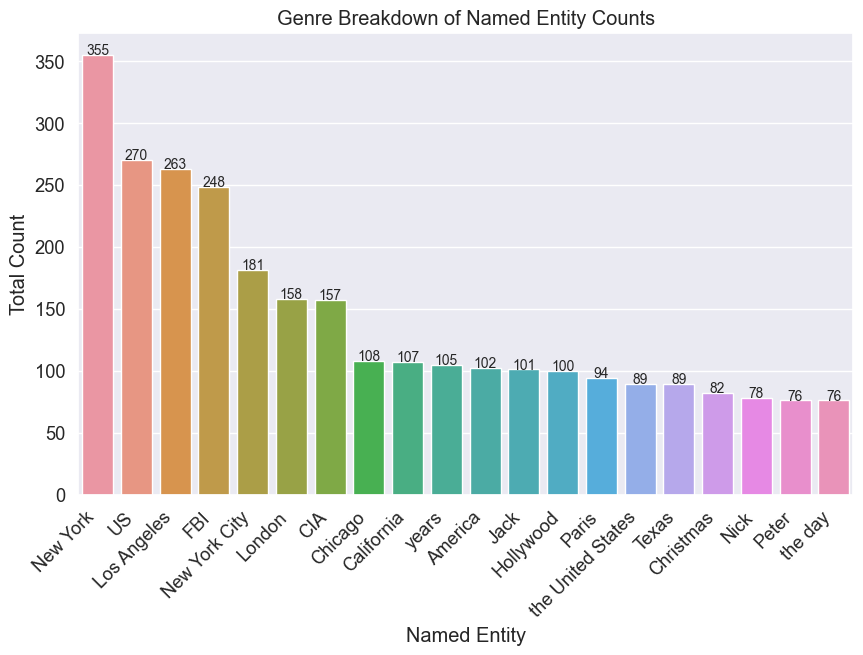

In [150]:
fig = plt.figure(figsize=(10,6))
sns.set_palette("muted")

named_entity_counts = pd.DataFrame({'names': names, 'count': count})
ax = sns.barplot(data=named_entity_counts, x='names', y='count', 
                 order=named_entity_counts.sort_values('count', ascending=False)['names'])

# Add numerical values to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height()+0.5, int(p.get_height()), 
            ha='center', fontsize=10)

ax.set(title='Genre Breakdown of Named Entity Counts', xlabel='Named Entity', ylabel='Total Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
plt.show()